In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns; sns.set()
%matplotlib inline
import random as rnd 

## Simulate the Second Half

***Simulation Idea Gotten from https://www.playingnumbers.com/2019/12/how-to-simulate-nba-games-in-python/***

**Read Second Half Stats**

In [2]:
df = pd.read_csv('second_half.csv')

In [3]:
df.head()

,Unnamed: 0,Team,Match Up,Game Date,Season,W/L,MIN,PTS,FGM,FGA,...,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-
0,0,WAS,WAS vs. MIL,02/24/2020,NaN,L,24,76,28,47,...,73.3,2,17,19,15,6,2,0,12,10
1,1,HOU,HOU vs. NYK,02/24/2020,NaN,W,24,51,17,43,...,63.2,4,17,21,8,6,9,4,11,-4
2,2,LAC,LAC vs. MEM,02/24/2020,NaN,W,24,58,21,45,...,62.5,4,18,22,18,6,2,1,10,-2
3,3,UTA,UTA vs. PHX,02/24/2020,NaN,L,24,49,15,35,...,83.3,3,13,16,6,13,1,2,11,-20
4,4,MIL,MIL @ WAS,02/24/2020,NaN,W,24,66,25,43,...,83.3,1,16,17,14,5,3,3,15,-10


**Drop unused columns**

In [4]:
df.drop(['Unnamed: 0','Season','W/L','Game\xa0Date','Match\xa0Up'],inplace = True,axis = 1)

In [5]:
df.head()

,Team,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-
0,WAS,24,76,28,47,59.6,9,16,56.3,11,...,73.3,2,17,19,15,6,2,0,12,10
1,HOU,24,51,17,43,39.5,5,25,20.0,12,...,63.2,4,17,21,8,6,9,4,11,-4
2,LAC,24,58,21,45,46.7,11,21,52.4,5,...,62.5,4,18,22,18,6,2,1,10,-2
3,UTA,24,49,15,35,42.9,4,10,40.0,15,...,83.3,3,13,16,6,13,1,2,11,-20
4,MIL,24,66,25,43,58.1,6,17,35.3,10,...,83.3,1,16,17,14,5,3,3,15,-10


**Calculate Points Against**

In [6]:
df['PA'] = df['PTS'] - df['+/-']

In [7]:
df.head()

,Team,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-,PA
0,WAS,24,76,28,47,59.6,9,16,56.3,11,...,2,17,19,15,6,2,0,12,10,66
1,HOU,24,51,17,43,39.5,5,25,20.0,12,...,4,17,21,8,6,9,4,11,-4,55
2,LAC,24,58,21,45,46.7,11,21,52.4,5,...,4,18,22,18,6,2,1,10,-2,60
3,UTA,24,49,15,35,42.9,4,10,40.0,15,...,3,13,16,6,13,1,2,11,-20,69
4,MIL,24,66,25,43,58.1,6,17,35.3,10,...,1,16,17,14,5,3,3,15,-10,76


**Get Team Averages**

In [22]:
team_df_avg = df.groupby(['Team']).mean()

In [23]:
team_df_avg.head()

,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,...,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-,PA
Team,,,,,,,,,,,,,,,,,,,,,
ATL,24.0,54.389831,19.508475,43.847458,44.728814,5.830508,17.677966,33.011864,9.542373,12.355932,...,4.898305,15.915254,20.813559,10.779661,8.152542,4.237288,2.542373,12.372881,-2.593220,56.983051
BKN,24.0,53.071429,18.696429,43.303571,43.285714,5.642857,17.464286,32.789286,10.035714,13.660714,...,5.625000,17.821429,23.446429,10.839286,7.696429,3.142857,2.214286,10.928571,-1.875000,54.946429
BOS,24.0,58.321429,20.946429,43.357143,48.428571,6.589286,16.392857,40.325000,9.839286,12.107143,...,5.375000,17.392857,22.767857,11.839286,7.464286,3.750000,3.000000,12.035714,5.017857,53.303571
CHA,24.0,49.392857,17.500000,41.696429,42.053571,5.875000,17.607143,33.053571,8.517857,11.285714,...,5.321429,15.392857,20.714286,10.785714,7.142857,3.053571,1.946429,9.642857,-4.017857,53.410714
CHI,24.0,52.258621,18.620690,42.637931,43.982759,6.086207,17.500000,34.946552,8.931034,11.465517,...,5.310345,15.241379,20.551724,10.655172,8.327586,4.931034,2.068966,11.465517,-2.534483,54.793103


**Get Team STDs**

In [10]:
team_df_std = df.groupby(['Team']).std()

In [11]:
team_df_std.head()

,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,...,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-,PA
Team,,,,,,,,,,,,,,,,,,,,,
ATL,0.0,8.483284,3.390519,4.678688,7.684468,2.275450,4.120766,10.686748,4.320449,5.336157,...,2.241420,3.936076,4.743324,2.871187,2.591854,2.168258,1.534905,3.139835,11.534235,10.690782
BKN,0.0,8.484975,3.721777,4.767006,7.940951,2.323231,4.435248,12.045485,4.427042,5.866009,...,2.178928,4.018625,4.483990,3.279561,3.218806,1.783037,1.670213,2.709291,11.155207,9.213468
BOS,0.0,7.251601,3.181878,4.337693,6.601617,2.364716,3.961995,11.869797,4.137530,5.054893,...,2.951502,3.393462,4.156008,2.820553,2.703293,1.947026,1.716233,2.891771,9.715014,7.261154
CHA,0.0,8.516676,3.405877,4.040340,7.790063,2.642743,3.783594,11.925175,4.655363,5.751567,...,2.573340,3.519703,4.618990,2.845822,2.561453,1.843116,1.506587,2.467450,13.216369,10.131457
CHI,0.0,8.476097,3.498509,4.696764,8.226895,2.415480,3.352140,12.049870,4.356331,5.198568,...,2.623824,3.362906,4.280402,2.467698,3.016841,2.142814,1.543090,3.393572,11.767060,8.961435


**Get Stats for Simulation**

In [12]:
used_cols = ['PTS','PA']

In [16]:
sim_stats = team_df_avg[used_cols]

In [20]:
sim_stats['PTS_STD'] = team_df_std['PTS']
sim_stats['PA_STD'] = team_df_std['PA']

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
sim_stats.head()

,PTS,PA,PTS_STD,PA_STD
Team,,,,
ATL,54.389831,56.983051,8.483284,10.690782
BKN,53.071429,54.946429,8.484975,9.213468
BOS,58.321429,53.303571,7.251601,7.261154
CHA,49.392857,53.410714,8.516676,10.131457
CHI,52.258621,54.793103,8.476097,8.961435


In [27]:
sim_stats['PTS']['ATL']

54.389830508474574

### Simulate Games

**Functions gotten from link above**

In [63]:
def game_sim(team1,team2):
    team1_pts = sim_stats['PTS'][team1]
    team1_std = sim_stats['PTS_STD'][team1]
    team1_pa = sim_stats['PA'][team1]
    team1_pa_std = sim_stats['PA_STD'][team1]
    
    
    team2_pts = sim_stats['PTS'][team2]
    team2_std = sim_stats['PTS_STD'][team2]
    team2_pa = sim_stats['PA'][team2]
    team2_pa_std = sim_stats['PA_STD'][team2]
    
    team1_score =  int(round(rnd.gauss(team1_pts,team1_std)+rnd.gauss(team2_pa,team2_pa_std))/2)
    team2_score = int(round(rnd.gauss(team2_pts,team2_std)+rnd.gauss(team1_pa,team1_pa_std))/2)
    
#     print(team1_score,team2_score)
    
   
    score_dif = team1_score-team2_score
    
    
    if team1_score > team2_score:
        return 1,score_dif
    if team1_score < team2_score:
        return -1,score_dif
    else:
        return 0,score_dif

In [108]:
def games_sim(num, team1, team2):
    total_games = []
    dif = []
    team1win = 0
    team2win = 0
    tie = 0
    
    for i in range(num):
        gm = game_sim(team1,team2)
        total_games.append(gm[0])
        dif.append(gm[1])
        if gm[0] == 1:
            team1win +=1 
        elif gm[0] == -1:
            team2win +=1
        else: tie +=1 
    
    plt.hist(dif,bins=10,range = (-15,15))
#     plt.xtick
    
    print(team1+ ' Wins ', team1win/(team1win+team2win+tie),'%')
    print(team2+ ' Wins ', team2win/(team1win+team2win+tie),'%')
    print('Tie ', tie/(team1win+team2win+tie), '%')
    
    print(pd.DataFrame(dif).describe())
    
    

MIL Wins  0.66203 %
GSW Wins  0.29539 %
Tie  0.04258 %
                   0
count  100000.000000
mean        3.983990
std         8.347884
min       -29.000000
25%        -2.000000
50%         4.000000
75%        10.000000
max        40.000000


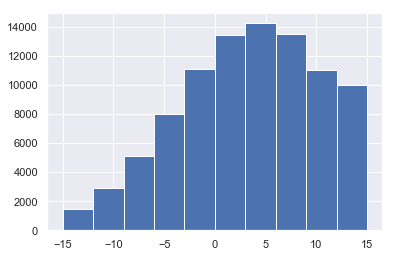

In [109]:
games_sim(100000,'MIL','GSW')